<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-normal-n-0-3-r14.csv?token=AKVFSOCLBWUIZPO6VLLA6BS6ZQMP6')
print(df.shape)
df

(15625, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,777,0,3,1,1,4,3,9,3,3,30,14,17,4,4,1.0,20,1,1,1,1,1,0,1,4,68,3,27,9,1
1,785,2,0,2,1,4,3,9,30,14,27,11,17,2,0,0.0,4,1,1,1,1,1,0,2,8,136,6,27,18,1
2,835,0,3,1,1,4,3,9,0,0,30,14,18,5,5,1.0,24,1,1,1,1,1,0,1,4,72,3,27,9,1
3,840,0,3,3,1,4,3,10,27,11,30,14,17,2,2,1.0,12,1,1,1,1,1,0,3,12,204,9,30,27,1
4,843,2,0,2,1,4,3,10,30,14,27,11,18,2,0,0.0,4,1,1,1,1,1,0,2,8,144,6,30,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15620,3268264,2,0,6,4,2,3,10,30,14,27,11,20036,2,0,0.0,25,1,1,1,1,1,0,24,48,961728,18,30,54,1
15621,3268271,2,0,6,5,3,3,10,30,14,27,11,20036,2,0,0.0,32,1,1,1,1,1,0,30,90,1803240,18,30,54,1
15622,3268272,2,0,2,1,4,3,11,30,14,27,11,20037,2,0,0.0,32,1,1,1,1,1,0,2,8,160296,6,33,18,1
15623,3268273,2,0,7,1,4,3,12,30,14,3,3,20036,4,0,0.0,5,1,1,1,1,1,0,7,28,561008,21,36,63,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-1-r14.csv?token=AKVFSOHSHMJNMRYFDRY7P6S6ZQMQE')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-6-r14.csv?token=AKVFSOEBRDNNZHS72BYBKAC6ZQMQK')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-9-r14.csv?token=AKVFSOFITE3ZHHYVNAMAH6K6ZQMQQ')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-14-r14.csv?token=AKVFSOGBQIENXKFI6NJP6RC6ZQMQY')

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-normal-n-0-5-r14.csv?token=AKVFSOAEEM2AIZRSZBXGCJS6ZQMZY')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-normal-n-0-12-r14.csv?token=AKVFSOHPKQSZUTZ6HWTZDA26ZQMZ4')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-normal-n-0-15-r14.csv?token=AKVFSODUV577BQTFP2GJQS26ZQM2C')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(23538, 30)
(24066, 30)
(23532, 30)
(83055, 30)
(15416, 30)
(29736, 30)
(35505, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,14,14,23,7,3,3,0,0.000000,4,6,1,6,6,36,0,1,4,12,3,27,9,0
1,15,2,4,1,1,4,3,9,12,12,23,7,2,5,2,0.400000,12,1,1,1,1,1,8,1,4,8,3,27,9,1
2,84,0,3,4,1,1,5,17,23,7,14,14,3,3,3,1.000000,16,5,2,6,10,60,0,4,4,12,20,85,100,0
3,85,0,3,4,2,2,5,17,23,7,14,14,3,3,3,1.000000,17,4,3,6,12,72,0,8,16,48,20,85,100,0
4,86,0,3,4,3,2,5,17,23,7,14,14,3,3,3,1.000000,18,3,4,6,12,72,0,12,24,72,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250468,3275434,3,2,5,2,2,3,9,15,15,22,6,20059,3,1,0.333333,15,5,1,5,5,25,6,10,20,401180,15,27,45,1
250469,3275441,3,2,5,3,2,3,9,15,15,22,6,20059,3,1,0.333333,22,4,2,5,8,40,6,15,30,601770,15,27,45,1
250470,3275448,3,2,5,4,2,3,9,15,15,22,6,20059,3,1,0.333333,29,3,3,5,9,45,6,20,40,802360,15,27,45,1
250471,3275455,3,2,5,5,3,3,9,15,15,22,6,20059,3,1,0.333333,36,2,4,5,8,40,6,25,75,1504425,15,27,45,1


In [0]:
df.shape

(250473, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-2-r14.csv?token=AKVFSOEJ34QJKHSBNXSONNS6ZQNCI')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-5-r14.csv?token=AKVFSOCLXPSP3NYHTCC3KG26ZQNCM')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-10-r14.csv?token=AKVFSOB7NY3KNDFHSJIESOC6ZQNCQ')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-12-r14.csv?token=AKVFSOC3VWHJ3BGL4KC4XKC6ZQNCW')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-13-r14.csv?token=AKVFSOCR3EQ34CLO6VAU6EK6ZQNC2')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-15-r14.csv?token=AKVFSOFIBFDUQDRUHTLV7CS6ZQNDA')

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-normal-n-0-10-r14.csv?token=AKVFSOCNV5MARWPZFXWOKM26ZQNJ6')
df5.shape

(24066, 30)

In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,777,0,3,1,1,4,3,9,3,3,30,14,25,4,4,1.0,20,1,1,1,1,1,0,1,4,100,3,27,9,0
1,785,2,0,2,1,4,3,9,30,14,27,11,25,2,0,0.0,4,1,1,1,1,1,0,2,8,200,6,27,18,0
2,794,0,3,1,1,4,3,9,2,2,30,14,26,3,3,1.0,16,1,1,1,1,1,0,1,4,104,3,27,9,0
3,802,2,0,2,1,4,3,10,30,14,27,11,26,2,0,0.0,4,1,1,1,1,1,0,2,8,208,6,30,18,0
4,840,0,3,3,1,4,3,9,27,11,30,14,25,2,2,1.0,12,1,1,1,1,1,0,3,12,300,9,27,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24061,3269785,2,0,6,4,2,3,12,30,14,27,11,30059,2,0,0.0,25,1,1,1,1,1,0,24,48,1442832,18,36,54,0
24062,3269792,2,0,6,5,3,3,12,30,14,27,11,30059,2,0,0.0,32,1,1,1,1,1,0,30,90,2705310,18,36,54,0
24063,3269793,2,0,2,1,4,3,9,30,14,27,11,30060,2,0,0.0,32,1,1,1,1,1,0,2,8,240480,6,27,18,0
24064,3269794,2,0,7,1,4,3,10,30,14,3,3,30059,4,0,0.0,6,1,1,1,1,1,0,7,28,841652,21,30,63,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.342185,0.149150,-0.028846,0.042638,-0.455720,-0.371845,-0.032826,0.110828,-0.687796,-0.790705,-0.182005,-0.140067,-0.028525,-0.103099,-0.077650,-0.061541,0.440511,0.047654,0.048463,0.019825,-0.082432,-0.428170,-0.308443,0.219703
inport,-0.342185,1.000000,-0.014378,0.015453,-0.022842,0.135657,-0.061203,0.009037,0.429221,0.612234,0.636226,0.262711,-0.089349,-0.178182,-0.163602,-0.128416,-0.098398,0.632036,0.009683,0.002387,0.012716,0.053435,0.055488,0.111231,0.153322
cache_coherence_type,0.149150,-0.014378,1.000000,0.292005,-0.431618,-0.180675,-0.225929,0.051438,0.037633,-0.161120,-0.202650,-0.406142,-0.021009,-0.071576,-0.056618,-0.028784,-0.014178,0.136731,0.499671,0.414010,0.318163,0.872979,-0.202622,0.486178,-0.002442
flit_id,-0.028846,0.015453,0.292005,1.000000,-0.075353,0.108952,0.050216,0.013499,-0.022682,0.036661,0.012895,0.478639,-0.000789,0.056219,0.033897,0.045055,0.029483,0.002214,0.959970,0.914205,0.674203,0.335110,0.086170,0.285643,-0.003778
flit_type,0.042638,-0.022842,-0.431618,-0.075353,1.000000,-0.161044,-0.074225,-0.019953,0.033526,-0.054189,-0.019061,0.403040,-0.107231,0.059549,-0.029159,-0.036333,-0.024146,-0.003272,-0.146810,0.124923,0.093004,-0.495331,-0.127369,-0.422214,0.005584
vnet,-0.455720,0.135657,-0.180675,0.108952,-0.161044,1.000000,0.933125,0.050457,-0.052259,0.353818,0.480006,-0.122289,0.237749,0.157321,0.241595,0.152230,0.082637,-0.289174,-0.035654,-0.047793,-0.014283,0.322005,0.988604,0.771638,-0.271726
vc,-0.371845,-0.061203,-0.225929,0.050216,-0.074225,0.933125,1.000000,0.054674,-0.145504,0.191877,0.302771,-0.144730,0.242977,0.202213,0.272245,0.179391,0.106367,-0.391044,-0.088678,-0.081565,-0.038891,0.245280,0.976617,0.682955,-0.310541
traversal_id,-0.032826,0.009037,0.051438,0.013499,-0.019953,0.050457,0.054674,1.000000,-0.051846,-0.010831,0.000114,-0.008284,0.047905,0.047951,0.058618,0.050558,0.038124,-0.032951,0.023484,0.020199,0.534386,0.074536,0.053060,0.078095,-0.311396
hop_count,0.110828,0.429221,0.037633,-0.022682,0.033526,-0.052259,-0.145504,-0.051846,1.000000,0.499814,0.210346,0.242791,-0.114940,-0.141447,-0.156787,-0.122017,-0.089809,0.395468,-0.027491,-0.007310,-0.029748,0.010308,-0.092167,-0.022094,0.174278
current_hop,-0.687796,0.612234,-0.161120,0.036661,-0.054189,0.353818,0.191877,-0.010831,0.499814,1.000000,0.888726,0.386435,0.052204,-0.086641,-0.021059,-0.019739,-0.013039,-0.051799,-0.054200,-0.053698,-0.043895,0.020375,0.291891,0.210164,-0.016567


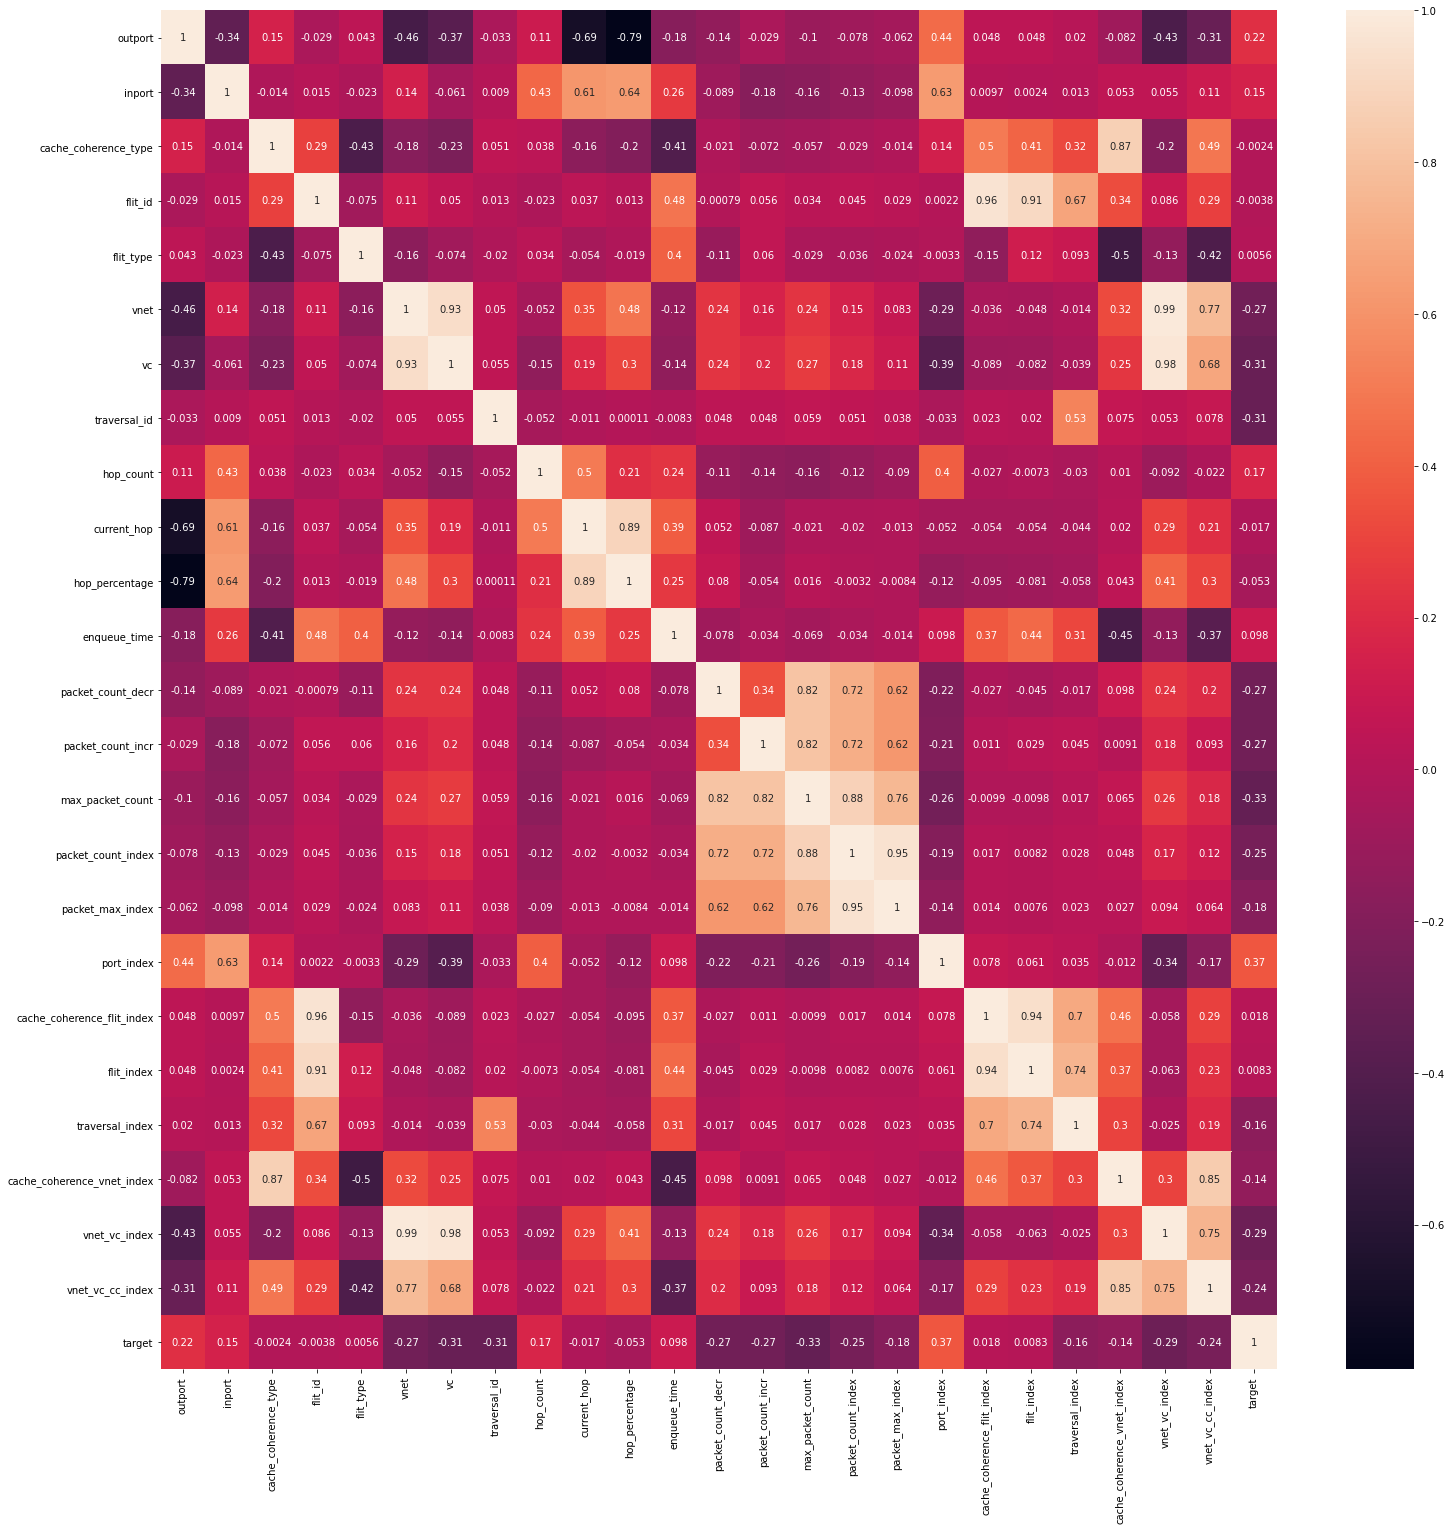

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,3,3,0,0.000000,4,6,1,6,6,36,0,1,4,12,3,27,9
1,2,4,1,1,4,3,9,2,5,2,0.400000,12,1,1,1,1,1,8,1,4,8,3,27,9
2,0,3,4,1,1,5,17,3,3,3,1.000000,16,5,2,6,10,60,0,4,4,12,20,85,100
3,0,3,4,2,2,5,17,3,3,3,1.000000,17,4,3,6,12,72,0,8,16,48,20,85,100
4,0,3,4,3,2,5,17,3,3,3,1.000000,18,3,4,6,12,72,0,12,24,72,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250468,3,2,5,2,2,3,9,20059,3,1,0.333333,15,5,1,5,5,25,6,10,20,401180,15,27,45
250469,3,2,5,3,2,3,9,20059,3,1,0.333333,22,4,2,5,8,40,6,15,30,601770,15,27,45
250470,3,2,5,4,2,3,9,20059,3,1,0.333333,29,3,3,5,9,45,6,20,40,802360,15,27,45
250471,3,2,5,5,3,3,9,20059,3,1,0.333333,36,2,4,5,8,40,6,25,75,1504425,15,27,45


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000033,0.500000,0.0,0.000000,0.000000,0.151515,0.000000,0.151515,0.016393,0.003364,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.833333,0.4,0.400000,0.108108,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00,0.75,0.500000,0.00,0.000000,1.0,1.000,0.000033,0.500000,0.6,1.000000,0.162162,0.121212,0.030303,0.151515,0.029508,0.005671,0.000000,0.103448,0.000000,0.000001,0.944444,1.000000,1.000000
3,0.00,0.75,0.500000,0.25,0.333333,1.0,1.000,0.000033,0.500000,0.6,1.000000,0.175676,0.090909,0.060606,0.151515,0.036066,0.006825,0.000000,0.241379,0.139535,0.000015,0.944444,1.000000,1.000000
4,0.00,0.75,0.500000,0.50,0.333333,1.0,1.000,0.000033,0.500000,0.6,1.000000,0.189189,0.060606,0.090909,0.151515,0.036066,0.006825,0.000000,0.379310,0.232558,0.000024,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250468,0.75,0.50,0.666667,0.25,0.333333,0.0,0.000,0.666766,0.500000,0.2,0.333333,0.148649,0.121212,0.000000,0.121212,0.013115,0.002307,0.500000,0.310345,0.186047,0.148178,0.666667,0.000000,0.395604
250469,0.75,0.50,0.666667,0.50,0.333333,0.0,0.000,0.666766,0.500000,0.2,0.333333,0.243243,0.090909,0.030303,0.121212,0.022951,0.003749,0.500000,0.482759,0.302326,0.222268,0.666667,0.000000,0.395604
250470,0.75,0.50,0.666667,0.75,0.333333,0.0,0.000,0.666766,0.500000,0.2,0.333333,0.337838,0.060606,0.060606,0.121212,0.026230,0.004230,0.500000,0.655172,0.418605,0.296358,0.666667,0.000000,0.395604
250471,0.75,0.50,0.666667,1.00,0.666667,0.0,0.000,0.666766,0.500000,0.2,0.333333,0.432432,0.030303,0.090909,0.121212,0.022951,0.003749,0.500000,0.827586,0.825581,0.555674,0.666667,0.000000,0.395604


In [0]:
train_X[train_X.duplicated()].shape

(7138, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.0,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.50,0.8,1.0,0.262295,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000037,0.166667,0.000000,0.166667
2,0.0,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.25,0.6,1.0,0.196721,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
3,0.5,0.00,0.166667,0.00,1.000000,0.0,0.333333,0.000033,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000040,0.166667,0.333333,0.166667
4,0.0,0.75,0.333333,0.00,1.000000,0.0,0.000000,0.000000,0.00,0.4,1.0,0.131148,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.000074,0.333333,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24061,0.5,0.00,0.833333,0.75,0.333333,0.0,1.000000,0.999967,0.00,0.0,0.0,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533316,0.833333,1.000000,0.833333
24062,0.5,0.00,0.833333,1.00,0.666667,0.0,1.000000,0.999967,0.00,0.0,0.0,0.459016,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333
24063,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000000,1.000000,0.00,0.0,0.0,0.459016,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088858,0.166667,0.000000,0.166667
24064,0.5,0.00,1.000000,0.00,1.000000,0.0,0.333333,0.999967,0.50,0.0,0.0,0.032787,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311086,1.000000,0.333333,1.000000


In [0]:
test_X[test_X.duplicated()].shape

(0, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.0,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.50,0.8,1.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.75,0.000000,0.00,1.000000,0.0,0.333333,0.000033,0.25,0.6,1.0,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000001,0.000000,0.333333,0.000000
2,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000037,0.166667,0.000000,0.166667
3,0.5,0.00,0.166667,0.00,1.000000,0.0,0.333333,0.000033,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000040,0.166667,0.333333,0.166667
4,0.0,0.75,0.333333,0.00,1.000000,0.0,0.000000,0.000000,0.00,0.4,1.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.000074,0.333333,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23527,0.5,0.00,0.833333,0.75,0.333333,0.0,1.000000,0.999967,0.00,0.0,0.0,0.328125,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533316,0.833333,1.000000,0.833333
23528,0.5,0.00,0.833333,1.00,0.666667,0.0,1.000000,0.999967,0.00,0.0,0.0,0.437500,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333
23529,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000000,1.000000,0.00,0.0,0.0,0.437500,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088858,0.166667,0.000000,0.166667
23530,0.5,0.00,1.000000,0.00,1.000000,0.0,0.333333,0.999967,0.50,0.0,0.0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311086,1.000000,0.333333,1.000000


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.0,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.8,1.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000037,0.166667,0.000000,0.166667
2,0.0,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.0,0.2,1.0,0.062500,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
3,0.5,0.00,0.166667,0.00,1.000000,0.0,0.333333,0.000033,0.2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000040,0.166667,0.333333,0.166667
4,0.0,0.75,0.333333,0.00,1.000000,0.0,0.000000,0.000000,0.2,0.4,1.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.000074,0.333333,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24055,0.5,0.00,0.833333,0.75,0.333333,0.0,1.000000,0.999967,0.2,0.0,0.0,0.328125,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533316,0.833333,1.000000,0.833333
24056,0.5,0.00,0.833333,1.00,0.666667,0.0,1.000000,0.999967,0.2,0.0,0.0,0.437500,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333
24057,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000000,1.000000,0.2,0.0,0.0,0.437500,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088858,0.166667,0.000000,0.166667
24058,0.5,0.00,1.000000,0.00,1.000000,0.0,0.333333,0.999967,0.6,0.0,0.0,0.031250,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311086,1.000000,0.333333,1.000000


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(22, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.75,0.4,0.4,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.75,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000200,0.50,0.4,0.5,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000009,0.000000,0.000000,0.000000
2,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000299,0.75,0.4,0.4,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000
3,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000632,0.75,0.4,0.4,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000028,0.000000,0.000000,0.000000
4,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000699,0.50,0.8,1.0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000031,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37853,0.75,1.00,0.666667,0.25,0.333333,0.0,0.000000,0.999967,0.50,0.4,0.5,0.234375,0.148148,0.037037,0.185185,0.043062,0.010036,1.000000,0.310345,0.186047,0.222278,0.666667,0.000000,0.666667
37854,0.75,1.00,0.666667,0.50,0.333333,0.0,0.000000,0.999967,0.50,0.4,0.5,0.343750,0.111111,0.074074,0.185185,0.052632,0.012077,1.000000,0.482759,0.302326,0.333419,0.666667,0.000000,0.666667
37855,0.75,1.00,0.666667,0.75,0.333333,0.0,0.000000,0.999967,0.50,0.4,0.5,0.453125,0.074074,0.111111,0.185185,0.052632,0.012077,1.000000,0.655172,0.418605,0.444560,0.666667,0.000000,0.666667
37856,0.75,1.00,0.666667,1.00,0.666667,0.0,0.000000,0.999967,0.50,0.4,0.5,0.562500,0.037037,0.148148,0.185185,0.043062,0.010036,1.000000,0.827586,0.825581,0.833554,0.666667,0.000000,0.666667


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(32, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.2,0.250000,0.062500,0.00,0.00,0.00,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.75,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000166,0.4,0.2,0.333333,0.062500,0.00,0.00,0.00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000007,0.000000,0.000000,0.000000
2,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000266,0.6,0.2,0.250000,0.062500,0.00,0.00,0.00,0.000000,0.000000,0.666667,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
3,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000599,0.6,0.2,0.250000,0.062500,0.00,0.00,0.00,0.000000,0.000000,0.666667,0.000000,0.000000,0.000027,0.000000,0.000000,0.000000
4,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000732,0.6,0.8,1.000000,0.250000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000033,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37865,0.50,0.00,0.833333,0.75,0.333333,0.0,1.000000,0.999933,0.2,0.0,0.000000,0.328125,0.12,0.24,0.36,0.149171,0.058973,0.000000,0.793103,0.511628,0.533331,0.833333,1.000000,0.833333
37866,0.50,0.00,0.833333,1.00,0.666667,0.0,1.000000,0.999933,0.2,0.0,0.000000,0.437500,0.08,0.28,0.36,0.127072,0.050518,0.000000,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333
37867,0.50,0.00,0.166667,0.00,1.000000,0.0,0.000000,1.000000,0.2,0.0,0.000000,0.437500,0.04,0.32,0.36,0.093923,0.037836,0.000000,0.034483,0.046512,0.088891,0.166667,0.000000,0.166667
37868,1.00,0.00,1.000000,0.00,1.000000,0.0,0.333333,0.999933,0.8,0.0,0.000000,0.015625,0.00,0.36,0.36,0.049724,0.020926,0.000000,0.206897,0.279070,0.311108,1.000000,0.333333,1.000000


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(33, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.00,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000000,0.6,0.2,0.250000,0.066667,0.000000,0.000000,0.000,0.000000,0.000000,1.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.75,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000100,0.4,0.2,0.333333,0.066667,0.000000,0.000000,0.000,0.000000,0.000000,0.75,0.000000,0.000000,0.000004,0.000000,0.0,0.000000
2,1.00,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000299,0.6,0.2,0.250000,0.066667,0.000000,0.000000,0.000,0.000000,0.000000,1.00,0.000000,0.000000,0.000013,0.000000,0.0,0.000000
3,1.00,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000399,0.8,0.2,0.200000,0.066667,0.000000,0.000000,0.000,0.000000,0.000000,1.00,0.000000,0.000000,0.000018,0.000000,0.0,0.000000
4,1.00,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000599,0.8,0.2,0.200000,0.066667,0.000000,0.000000,0.000,0.000000,0.000000,1.00,0.000000,0.000000,0.000027,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43609,0.75,0.5,0.666667,0.00,0.000000,0.0,0.0,1.000000,0.4,0.2,0.333333,0.066667,0.000000,0.000000,0.000,0.000000,0.000000,0.75,0.137931,0.011628,0.055563,0.666667,0.0,0.666667
43610,0.75,0.5,0.666667,0.25,0.333333,0.0,0.0,1.000000,0.4,0.2,0.333333,0.183333,0.125000,0.000000,0.125,0.017857,0.003551,0.75,0.310345,0.186047,0.222276,0.666667,0.0,0.666667
43611,0.75,0.5,0.666667,0.50,0.333333,0.0,0.0,1.000000,0.4,0.2,0.333333,0.300000,0.083333,0.041667,0.125,0.029762,0.005445,0.75,0.482759,0.302326,0.333417,0.666667,0.0,0.666667
43612,0.75,0.5,0.666667,0.75,0.333333,0.0,0.0,1.000000,0.4,0.2,0.333333,0.416667,0.041667,0.083333,0.125,0.029762,0.005445,0.75,0.655172,0.418605,0.444559,0.666667,0.0,0.666667


In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.0,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.00000,0.0,0.2,1.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000000,0.00000,0.2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000038,0.166667,0.000000,0.166667
2,0.0,0.75,0.333333,0.00,1.000000,0.0,0.000000,0.00000,0.2,0.4,1.0,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.000075,0.333333,0.000000,0.333333
3,0.0,0.75,0.000000,0.00,1.000000,0.0,0.333333,0.00005,0.8,1.0,1.0,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000002,0.000000,0.333333,0.000000
4,0.5,0.00,0.166667,0.00,1.000000,0.0,0.333333,0.00005,0.2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000042,0.166667,0.333333,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,0.5,0.00,0.833333,0.75,0.333333,0.0,0.333333,0.99995,0.2,0.0,0.0,0.403846,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533316,0.833333,0.333333,0.833333
15932,0.5,0.00,0.833333,1.00,0.666667,0.0,0.333333,0.99995,0.2,0.0,0.0,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
15933,0.5,0.00,0.166667,0.00,1.000000,0.0,0.666667,1.00000,0.2,0.0,0.0,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088859,0.166667,0.666667,0.166667
15934,1.0,0.00,1.000000,0.00,1.000000,0.0,1.000000,0.99995,0.8,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311085,1.000000,1.000000,1.000000


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    154191
1     96282
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs         Score
5                         vnet  13223.115563
22               vnet_vc_index  11699.394178
17                  port_index  10887.489319
6                           vc  10463.016221
14            max_packet_count   5880.089438
12           packet_count_decr   2946.528151
13           packet_count_incr   2933.562231
7                 traversal_id   2930.247847
0                      outport   2430.968575
15          packet_count_index   1868.534443
23            vnet_vc_cc_index   1539.328621
1                       inport   1336.465644
20             traversal_index    942.462543
16            packet_max_index    862.255841
8                    hop_count    465.940168
21  cache_coherence_vnet_index    414.794793
10              hop_percentage    187.413043


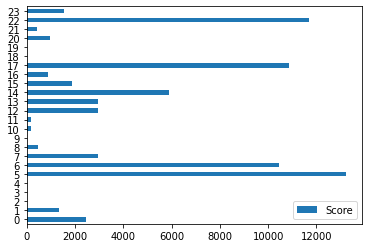

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 76.68855862420027
Test Prediction  76.79209501946302


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  93.38901354608161


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  60.560088390277066


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  91.19700748129675


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  76.24280204976492


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  81.32558753630842


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  38.226257623698814


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  11.558734939759036


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
17,port_index,7.703949
15,packet_count_index,6.320890
10,hop_percentage,4.544427
16,packet_max_index,3.573891
2,cache_coherence_type,1.756269
6,vc,1.399208
3,flit_id,1.354518
8,hop_count,0.957878
19,flit_index,0.704793
11,enqueue_time,0.246738


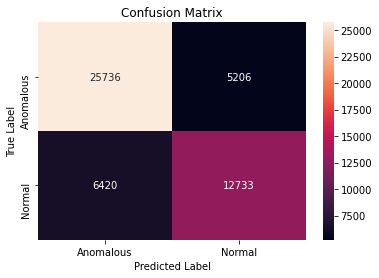

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82     30942
           1       0.71      0.66      0.69     19153

    accuracy                           0.77     50095
   macro avg       0.76      0.75      0.75     50095
weighted avg       0.77      0.77      0.77     50095



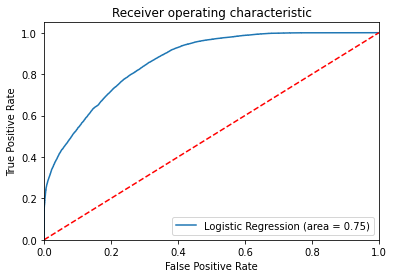

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

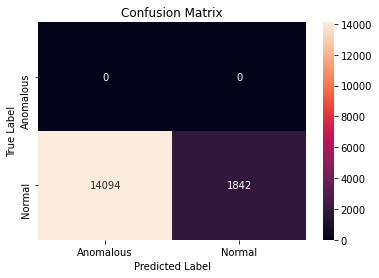

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.12      0.21     15936

    accuracy                           0.12     15936
   macro avg       0.50      0.06      0.10     15936
weighted avg       1.00      0.12      0.21     15936



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 90.2164908323269
Test Prediction  84.02435372791696


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  77.26252804786836


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  74.08635050144484


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  68.11720698254365


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  45.34840720587459


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  53.366781093213625


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  37.302242399229605


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  36.89131526104418


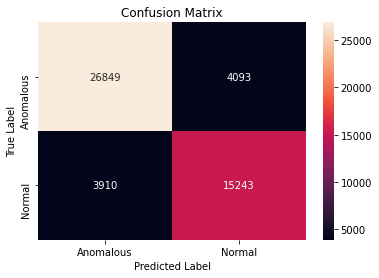

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     30942
           1       0.79      0.80      0.79     19153

    accuracy                           0.84     50095
   macro avg       0.83      0.83      0.83     50095
weighted avg       0.84      0.84      0.84     50095



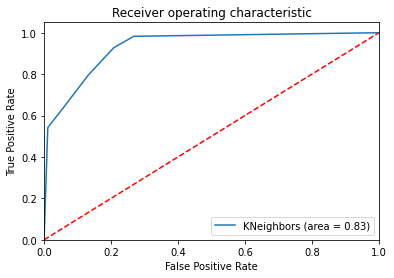

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

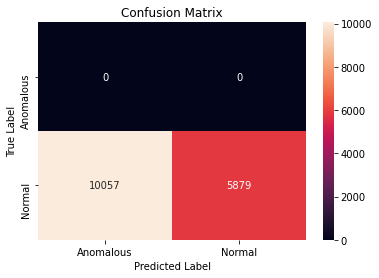

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.37      0.54     15936

    accuracy                           0.37     15936
   macro avg       0.50      0.18      0.27     15936
weighted avg       1.00      0.37      0.54     15936



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 59.33435806326044
Test Prediction Score 59.355225072362515


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 37.88332086761406


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  36.32075471698113


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  37.71404821280133


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  33.17396587247081


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  34.446791655664114


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  39.468977851148715


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  65.49949799196787


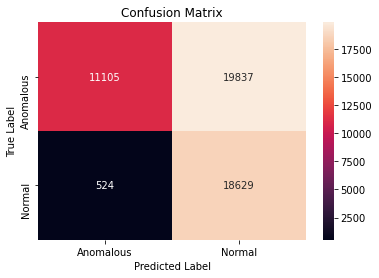

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.36      0.52     30942
           1       0.48      0.97      0.65     19153

    accuracy                           0.59     50095
   macro avg       0.72      0.67      0.58     50095
weighted avg       0.77      0.59      0.57     50095



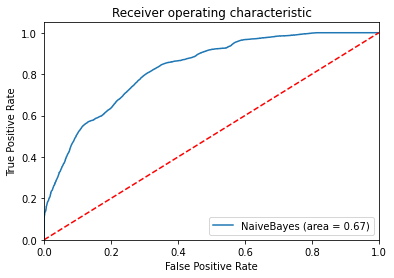

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 160302 samples, validate on 40076 samples
Epoch 1/10
160302/160302 [==============================] - 7s 43us/step - loss: 0.1704 - accuracy: 0.7350 - val_loss: 0.1553 - val_accuracy: 0.7670
Epoch 2/10
160302/160302 [==============================] - 6s 40us/step - loss: 0.1534 - accuracy: 0.7676 - val_loss: 0.1523 - val_accuracy: 0.7697
Epoch 3/10
160302/160302 [==============================] - 6s 40us/step - loss: 0.1508 - accuracy: 0.7684 - val_loss: 0.1498 - val_accuracy: 0.7678
Epoch 4/10
160302/160302 [==============================] - 7s 42us/step - loss: 0.1488 - accuracy: 0.7697 - val_loss: 0.1483 - val_accuracy: 0.7708
Epoch 5/10
160302/160302 [==============================] - 7s 43us/step - loss: 0.1478 - accuracy: 0.7706 - val_loss: 0.1476 - val_accuracy: 0.7727
Epoch 6/10
160302/160302 [==============================] - 9s 56us/step - loss: 0.1471 - accuracy: 0.7713 - val_loss: 0.1471 - val_accuracy: 0.7707
Epoch 7/10
160302/160302 [=============================

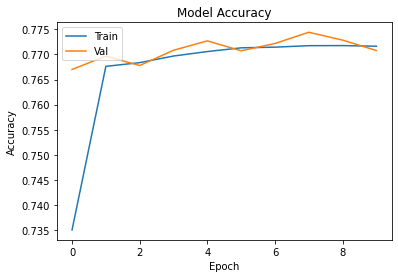

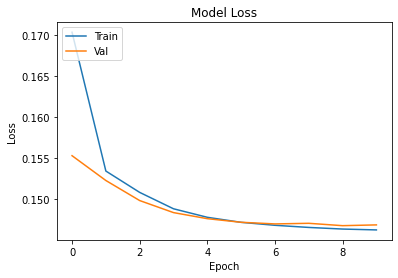

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.18%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 89.99%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 55.56%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 87.64%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.67%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 76.61%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 37.48%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 14.17%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 160302 samples, validate on 40076 samples
Epoch 1/30
160302/160302 [==============================] - 6s 39us/step - loss: 0.2075 - accuracy: 0.7040 - val_loss: 0.1767 - val_accuracy: 0.7677
Epoch 2/30
160302/160302 [==============================] - 6s 38us/step - loss: 0.1660 - accuracy: 0.7698 - val_loss: 0.1584 - val_accuracy: 0.7737
Epoch 3/30
160302/160302 [==============================] - 6s 38us/step - loss: 0.1525 - accuracy: 0.7744 - val_loss: 0.1481 - val_accuracy: 0.7773
Epoch 4/30
160302/160302 [==============================] - 6s 38us/step - loss: 0.1448 - accuracy: 0.7776 - val_loss: 0.1427 - val_accuracy: 0.7805
Epoch 5/30
160302/160302 [==============================] - 6s 38us/step - loss: 0.1406 - accuracy: 0.7798 - val_loss: 0.1396 - val_accuracy: 0.7783
Epoch 6/30
160302/160302 [==============================] - 6s 38us/step - loss: 0.1381 - accuracy: 0.7806 - val_loss: 0.1376 - val_accuracy: 0.7849
Epoch 7/30
160302/160302 [=============================

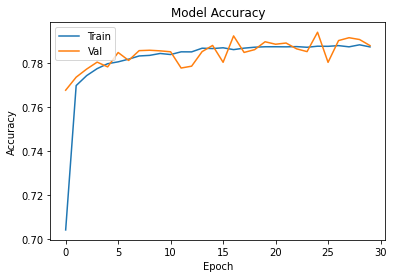

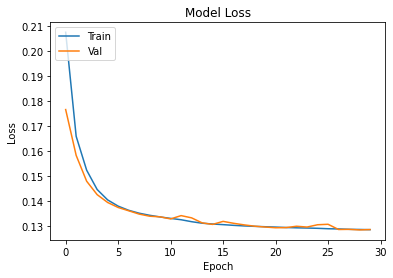

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.96%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.36%
accuracy: 99.29%
accuracy: 98.61%
accuracy: 82.05%
accuracy: 83.66%
accuracy: 62.46%
accuracy: 0.82%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 160302 samples, validate on 40076 samples
Epoch 1/30
160302/160302 [==============================] - 6s 40us/step - loss: 0.2064 - accuracy: 0.6701 - val_loss: 0.1773 - val_accuracy: 0.7627
Epoch 2/30
160302/160302 [==============================] - 7s 46us/step - loss: 0.1659 - accuracy: 0.7614 - val_loss: 0.1581 - val_accuracy: 0.7649
Epoch 3/30
160302/160302 [==============================] - 7s 42us/step - loss: 0.1531 - accuracy: 0.7695 - val_loss: 0.1491 - val_accuracy: 0.7736
Epoch 4/30
160302/160302 [==============================] - 7s 41us/step - loss: 0.1446 - accuracy: 0.7785 - val_loss: 0.1409 - val_accuracy: 0.7822
Epoch 5/30
160302/160302 [==============================] - 6s 40us/step - loss: 0.1383 - accuracy: 0.7828 - val_loss: 0.1374 - val_accuracy: 0.7892
Epoch 6/30
160302/160302 [==============================] - 6s 40us/step - loss: 0.1341 - accuracy: 0.7858 - val_loss: 0.1324 - val_accuracy: 0.7895
Epoch 7/30
160302/160302 [=============================

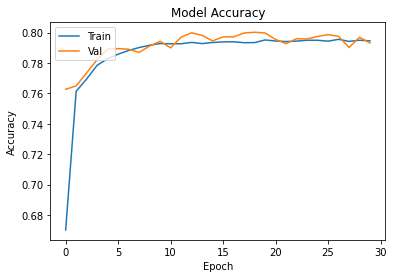

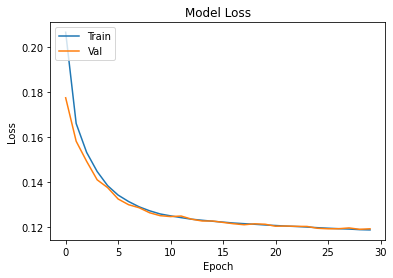

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.50%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 95.92%
accuracy: 94.72%
accuracy: 93.30%
accuracy: 78.07%
accuracy: 79.15%
accuracy: 67.17%
accuracy: 4.84%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 160302 samples, validate on 40076 samples
Epoch 1/100
160302/160302 [==============================] - 15s 93us/step - loss: 0.1292 - accuracy: 0.7787 - val_loss: 0.1197 - val_accuracy: 0.7971
Epoch 2/100
160302/160302 [==============================] - 13s 84us/step - loss: 0.1208 - accuracy: 0.7883 - val_loss: 0.1151 - val_accuracy: 0.8013
Epoch 3/100
160302/160302 [==============================] - 15s 93us/step - loss: 0.1180 - accuracy: 0.7942 - val_loss: 0.1136 - val_accuracy: 0.8068
Epoch 4/100
160302/160302 [==============================] - 14s 86us/step - loss: 0.1163 - accuracy: 0.7980 - val_loss: 0.1117 - val_accuracy: 0.8070
Epoch 5/100
160302/160302 [==============================] - 13s 81us/step - loss: 0.1150 - accuracy: 0.8006 - val_loss: 0.1129 - val_accuracy: 0.8134
Epoch 6/100
160302/160302 [==============================] - 13s 82us/step - loss: 0.1132 - accuracy: 0.8037 - val_loss: 0.1107 - val_accuracy: 0.8022
Epoch 7/100
160302/160302 [================

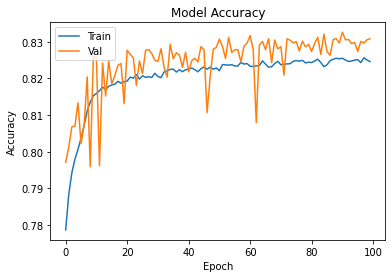

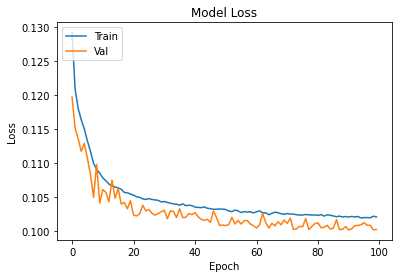

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 82.90%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 60.84%
accuracy: 57.36%
accuracy: 65.20%
accuracy: 48.35%
accuracy: 54.31%
accuracy: 38.50%
accuracy: 40.79%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 160302 samples, validate on 40076 samples
Epoch 1/50
160302/160302 [==============================] - 12s 77us/step - loss: 0.1298 - accuracy: 0.7785 - val_loss: 0.1174 - val_accuracy: 0.7929
Epoch 2/50
160302/160302 [==============================] - 12s 73us/step - loss: 0.1210 - accuracy: 0.7897 - val_loss: 0.1176 - val_accuracy: 0.8041
Epoch 3/50
160302/160302 [==============================] - 12s 73us/step - loss: 0.1190 - accuracy: 0.7950 - val_loss: 0.1168 - val_accuracy: 0.7966
Epoch 4/50
160302/160302 [==============================] - 12s 72us/step - loss: 0.1177 - accuracy: 0.7978 - val_loss: 0.1117 - val_accuracy: 0.8074
Epoch 5/50
160302/160302 [==============================] - 12s 72us/step - loss: 0.1151 - accuracy: 0.8018 - val_loss: 0.1100 - val_accuracy: 0.8130
Epoch 6/50
160302/160302 [==============================] - 11s 71us/step - loss: 0.1138 - accuracy: 0.8022 - val_loss: 0.1105 - val_accuracy: 0.8105
Epoch 7/50
160302/160302 [=======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.03%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.07%
accuracy: 79.93%
accuracy: 74.79%
accuracy: 58.20%
accuracy: 59.23%
accuracy: 50.09%
accuracy: 18.21%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 91.20013175099064
Test Prediction Score 89.14462521209701


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 75.1765976896867
Test Prediction Score 84.14499405065443
Test Prediction Score 81.77888611803824
Test Prediction Score 71.81837392360929
Test Prediction Score 74.12199630314234
Test Prediction Score 83.10404915852708
Test Prediction Score 20.582329317269078


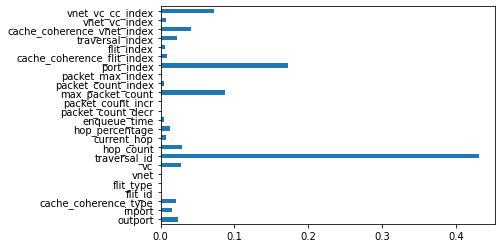

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

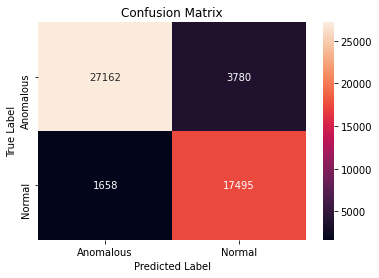

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     30942
           1       0.82      0.91      0.87     19153

    accuracy                           0.89     50095
   macro avg       0.88      0.90      0.89     50095
weighted avg       0.90      0.89      0.89     50095



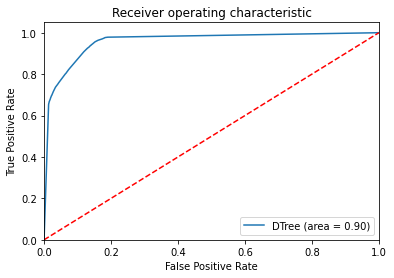

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 93.83614967711026
Test Prediction Score 90.2385467611538


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 74.53253552729993
Test Prediction Score 86.75845656977732
Test Prediction Score 82.8428927680798
Test Prediction Score 59.282053991230384
Test Prediction Score 61.62661737523105
Test Prediction Score 64.87137157793369
Test Prediction Score 18.216616465863453


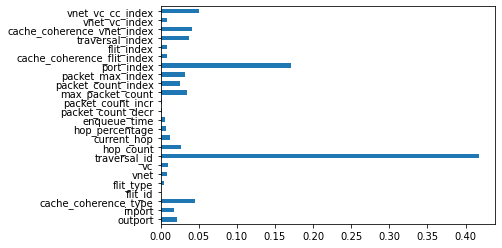

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

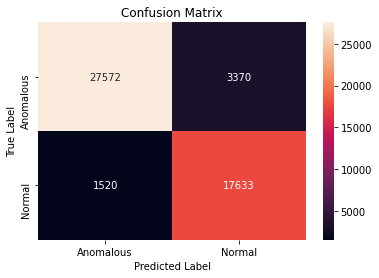

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     30942
           1       0.84      0.92      0.88     19153

    accuracy                           0.90     50095
   macro avg       0.89      0.91      0.90     50095
weighted avg       0.91      0.90      0.90     50095



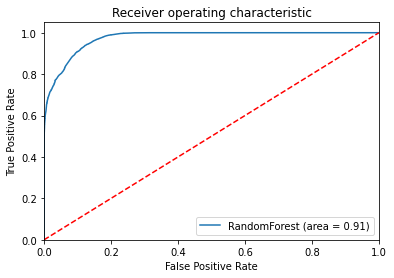

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [123]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [125]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 98.97344019802573
Test Prediction Score 95.10929234454537


In [126]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 69.30524391257376
Test Prediction Score 65.57028726840048
Test Prediction Score 76.97007481296758
Test Prediction Score 56.80965713983834
Test Prediction Score 59.02297332981251
Test Prediction Score 56.48415646352088
Test Prediction Score 23.895582329317268


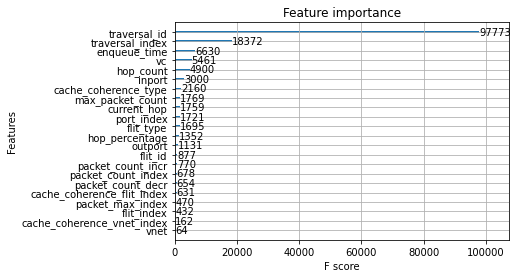

In [127]:
plot_importance(xgbc)
plt.show()

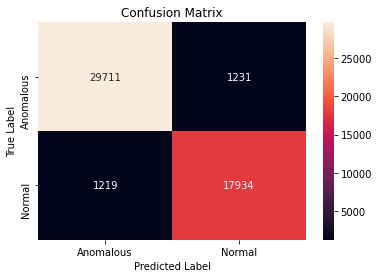

In [128]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [129]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     30942
           1       0.94      0.94      0.94     19153

    accuracy                           0.95     50095
   macro avg       0.95      0.95      0.95     50095
weighted avg       0.95      0.95      0.95     50095



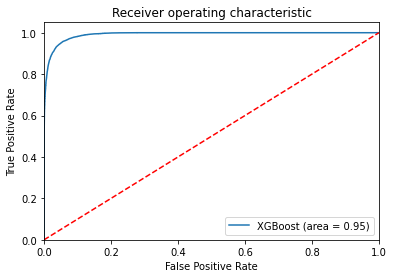

In [130]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [132]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [134]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 88.1783429318588
Test Prediction Score 86.79508933027248


In [135]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 73.70148757583313
Test Prediction Score 63.23304436511984
Test Prediction Score 76.83291770573565
Test Prediction Score 55.021395741983206
Test Prediction Score 56.23712701346712
Test Prediction Score 49.22501948915486
Test Prediction Score 22.797439759036145


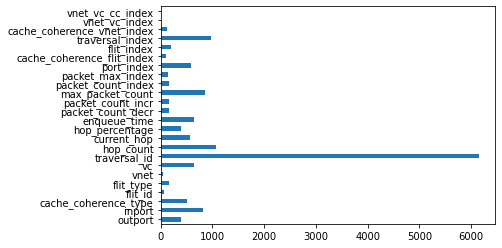

In [136]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

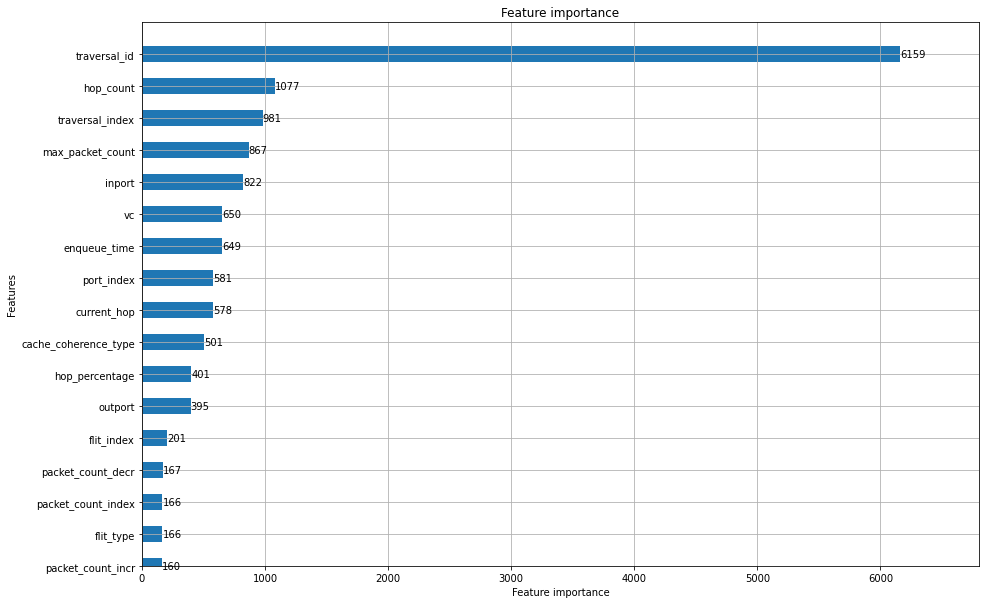

In [137]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [138]:
sorted(gbm.feature_importances_,reverse=True)

[6159,
 1077,
 981,
 867,
 822,
 650,
 649,
 581,
 578,
 501,
 401,
 395,
 201,
 167,
 166,
 166,
 160,
 153,
 121,
 97,
 57,
 47,
 4,
 0]

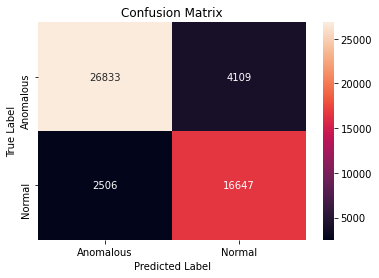

In [139]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [140]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     30942
           1       0.80      0.87      0.83     19153

    accuracy                           0.87     50095
   macro avg       0.86      0.87      0.86     50095
weighted avg       0.87      0.87      0.87     50095



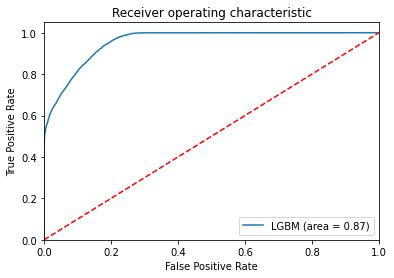

In [141]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()